# Data set overview
In this notebook we track all input files for climate and merge them

## `climate_data/`
### `climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2012.csv`:

In [1]:
import pandas as pd
s3_root = "s3://ecb-hackathon-data-group03-x19s00/climate_data_full"

In [2]:
years = range(2012, 2019)
dfs = [pd.read_csv(f"{s3_root}/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_{year}.csv") for year in years]

absorbed_photosynthetically_active_radiation_anomaly = pd.concat(dfs).rename(columns={"MEDIAN":"absorbed_photosynthetically_active_radiation_anomaly_median"}).convert_dtypes()
absorbed_photosynthetically_active_radiation_anomaly.head()

NUTS_ID   TIMESTAMP  \
0      AD  2012-01-01   
1   AL011  2012-01-01   
2   AL012  2012-01-01   
3   AL013  2012-01-01   
4   AL014  2012-01-01   

   absorbed_photosynthetically_active_radiation_anomaly_median  
0                                                1.0            
1                                             -0.509            
2                                             -0.754            
3                                             -0.674            
4                                             -0.355

In [3]:
dates = absorbed_photosynthetically_active_radiation_anomaly['TIMESTAMP'].unique()
print(f"There are {len(dates)} unique dates, i.e. monthly data from 2012 to 2019: {list(dates)[0:10]}...")

There are 84 unique dates, i.e. monthly data from 2012 to 2019: ['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01']...


### `/climate_data/heat_intensity/`':

In [4]:
# only one file
heat_intensity = pd.read_csv(f"{s3_root}/heat_intensity/intensity_2001-2022.csv").rename(columns={"median":"heat_intensity_median"}).convert_dtypes()
heat_intensity['date'] = heat_intensity['date'].str[0:10]
heat_intensity.head()

date  year NUTS_ID  heat_intensity_median
0  2001-01-08  2001   HU331               0.699417
1  2001-01-08  2001   HU233               0.468749
2  2001-01-08  2001   HR024               2.423235
3  2001-01-08  2001   HR033               1.596077
4  2001-01-08  2001   HR034               1.592936

In [5]:
dates = list(heat_intensity['date'].unique())
print(f"There are {len(dates)} unique dates, i.e. daily from 2012 to 2019: {list(dates)[0:10]}...")

There are 4216 unique dates, i.e. daily from 2012 to 2019: ['2001-01-08', '2001-01-09', '2001-01-15', '2001-01-16', '2001-01-17', '2001-01-18', '2001-01-25', '2001-01-26', '2001-01-27', '2001-01-28']...


This file is the odd one out, we have daily data rather than monthly...

### `climate_data/low_flow_index/lfinx_NUTS3_MAX_2001.csv`

In [6]:
years = range(2001, 2023)
dfs = [pd.read_csv(f"{s3_root}/low_flow_index/lfinx_NUTS3_MAX_{year}.csv") for year in years]
low_flow_index = pd.concat(dfs).rename(columns={' MONTHLY_MAX                                                 ': "low_flow_index_monthly_max", ' TIMESTAMP':"TIMESTAMP"})
low_flow_index.head()

NUTS_ID   TIMESTAMP  low_flow_index_monthly_max
0   AL011  2001-01-01                         0.0
1   AL013  2001-01-01                         0.0
2   AL014  2001-01-01                         0.0
3   AL015  2001-01-01                         0.0
4   AL021  2001-01-01                         0.0

### `s3://ecb-hackathon-data-group03-x19s00/climate_data/soil_mosture_anomaly/smian_NUTS3_MEDIAN_2001.csv`:

In [7]:
years = range(2001, 2023)
dfs = [pd.read_csv(f"{s3_root}/soil_mosture_anomaly/smian_NUTS3_MEDIAN_{year}.csv") for year in years]
soil_mosture_anomaly = pd.concat(dfs).rename(columns={"MEDIAN":"soil_mosture_anomaly_median", "NUTS_CODE": "NUTS_ID"})
soil_mosture_anomaly.head()

NUTS_ID   TIMESTAMP  soil_mosture_anomaly_median
0      AD  2001-01-01                        0.815
1   AL011  2001-01-01                       -0.324
2   AL012  2001-01-01                        0.735
3   AL013  2001-01-01                        0.573
4   AL014  2001-01-01                        0.785

### `climate_data/spi/spa01_NUTS3_MEDIAN_2001.csv`

In [8]:
years = range(2001, 2023)
dfs = [pd.read_csv(f"{s3_root}/spi/spa01_NUTS3_MEDIAN_{year}.csv") for year in years]
spi01 = pd.concat(dfs).rename(columns={' MEDIAN                                                      ':"precipitation_index_median_01", ' TIMESTAMP': 'TIMESTAMP'})

dfs = [pd.read_csv(f"{s3_root}/spi/spa03_NUTS3_MEDIAN_{year}.csv") for year in years]
spi03 = pd.concat(dfs).rename(columns={' MEDIAN                                                      ':"precipitation_index_median_03", ' TIMESTAMP': 'TIMESTAMP'})

dfs = [pd.read_csv(f"{s3_root}/spi/spa06_NUTS3_MEDIAN_{year}.csv") for year in years]
spi06 = pd.concat(dfs).rename(columns={' MEDIAN                                                      ':"precipitation_index_median_06", ' TIMESTAMP': 'TIMESTAMP'})

years = range(2001, 2019)
dfs = [pd.read_csv(f"{s3_root}/spi/spa12_NUTS3_MEDIAN_{year}.csv") for year in years]
spi12 = pd.concat(dfs).rename(columns={' MEDIAN                                                      ':"precipitation_index_median_12", ' TIMESTAMP': 'TIMESTAMP'})

keys = ['NUTS_ID', 'TIMESTAMP']
spi = (spi01.merge(spi03, on=keys, how='outer')
            .merge(spi06, on=keys, how='outer')
            .merge(spi12, on=keys, how='outer')
)




spi.head()

NUTS_ID   TIMESTAMP  precipitation_index_median_01  \
0   AL011  2001-01-01                         0.1130   
1   AL012  2001-01-01                         0.2905   
2   AL013  2001-01-01                         0.3270   
3   AL014  2001-01-01                         0.3320   
4   AL015  2001-01-01                         0.5720   

   precipitation_index_median_03  precipitation_index_median_06  \
0                        -0.2670                        -0.9130   
1                         0.3215                        -0.5500   
2                        -0.0620                        -0.2765   
3                         0.1080                        -0.2270   
4                         0.5610                         0.4480   

   precipitation_index_median_12  
0                        -1.0900  
1                        -0.7295  
2                        -0.8495  
3                        -0.5860  
4                        -0.2130

In [10]:
import numpy as np
spi_columns = ['precipitation_index_median_01',  'precipitation_index_median_03', 'precipitation_index_median_06', 'precipitation_index_median_12']

for spi_col in spi_columns:
    spi[f"{spi_col}_wet"] = spi[spi_col].clip(lower=0)
    spi[f"{spi_col}_drght"] = spi[spi_col].clip(upper=0)
    spi[f"{spi_col}_wet"] = spi[f"{spi_col}_wet"].replace(0, np.nan)
    spi[f"{spi_col}_drght"] = spi[f"{spi_col}_drght"].replace(0, np.nan)

In [418]:
spi.head()

NUTS_ID   TIMESTAMP  precipitation_index_median_01  \
0   AL011  2001-01-01                         0.1130   
1   AL012  2001-01-01                         0.2905   
2   AL013  2001-01-01                         0.3270   
3   AL014  2001-01-01                         0.3320   
4   AL015  2001-01-01                         0.5720   

   precipitation_index_median_03  precipitation_index_median_06  \
0                        -0.2670                        -0.9130   
1                         0.3215                        -0.5500   
2                        -0.0620                        -0.2765   
3                         0.1080                        -0.2270   
4                         0.5610                         0.4480   

   precipitation_index_median_12  precipitation_index_median_01_wet  \
0                        -1.0900                             0.1130   
1                        -0.7295                             0.2905   
2                        -0.8495                             0.3270   
3                        -0.5860                             0.3320   
4                        -0.2130                             0.5720   

   precipitation_index_median_01_drght  precipitation_index_median_03_wet  \
0                                  NaN                                NaN   
1                                  NaN                             0.3215   
2                                  NaN                                NaN   
3                                  NaN                             0.1080   
4                                  NaN                             0.5610   

   precipitation_index_median_03_drght  precipitation_index_median_06_wet  \
0                               -0.267                                NaN   
1                                  NaN                                NaN   
2                               -0.062                                NaN   
3                                  NaN                                NaN   
4                                  NaN                              0.448   

   precipitation_index_median_06_drght  precipitation_index_median_12_wet  \
0                              -0.9130                                NaN   
1                              -0.5500                                NaN   
2                              -0.2765                                NaN   
3                              -0.2270                                NaN   
4                                  NaN                                NaN   

   precipitation_index_median_12_drght  
0                              -1.0900  
1                              -0.7295  
2                              -0.8495  
3                              -0.5860  
4                              -0.2130

## `climate_data/temp_max/tpmax_NUTS3_MEDIAN_{year}.csv`

In [14]:
years = range(2001, 2024)
dfs = [pd.read_csv(f"s3://ecb-hackathon-data-group03-x19s00/climate_data_full/temp_max/tpmax_NUTS3_MEDIAN_{year}.csv") for year in years]
temp_max = pd.concat(dfs).rename(columns={"MEDIAN":"temp_max_median", "NUTS_CODE":"NUTS_ID"})
temp_max.head()

NUTS_ID   TIMESTAMP  temp_max_median
0   AL011  2001-01-01            5.730
1   AL012  2001-01-01           13.260
2   AL013  2001-01-01            3.682
3   AL014  2001-01-01            9.742
4   AL015  2001-01-01            7.825

### **Merge all Climate data**

In [15]:
join_cols = ["NUTS_ID", 'TIMESTAMP']
parameters = {
    "on": join_cols,
    "how": "outer",
    "validate": "1:1"
}

climate_merge = (absorbed_photosynthetically_active_radiation_anomaly
                 .merge(low_flow_index, **parameters)
                 .merge(soil_mosture_anomaly, **parameters)
                 .merge(spi,  **parameters)
                 .merge(temp_max, **parameters)
                )
climate_merge['year_month'] = climate_merge['TIMESTAMP'].str[0:7]
climate_merge['year'] = climate_merge['TIMESTAMP'].str[0:4]
climate_merge.head()

NUTS_ID   TIMESTAMP  \
0      AD  2012-01-01   
1   AL011  2012-01-01   
2   AL012  2012-01-01   
3   AL013  2012-01-01   
4   AL014  2012-01-01   

   absorbed_photosynthetically_active_radiation_anomaly_median  \
0                                                1.0             
1                                             -0.509             
2                                             -0.754             
3                                             -0.674             
4                                             -0.355             

   low_flow_index_monthly_max  soil_mosture_anomaly_median  \
0                         NaN                        0.768   
1                       0.705                       -0.149   
2                         NaN                       -2.146   
3                       0.000                       -2.772   
4                       0.705                       -2.254   

   precipitation_index_median_01  precipitation_index_median_03  \
0                            NaN                            NaN   
1                         -0.064                         -1.310   
2                         -0.098                         -1.230   
3                          0.059                         -1.335   
4                         -0.086                         -1.210   

   precipitation_index_median_06  precipitation_index_median_12  \
0                            NaN                            NaN   
1                         -1.840                         -1.920   
2                         -1.855                         -2.215   
3                         -1.890                         -2.215   
4                         -2.040                         -2.420   

   precipitation_index_median_01_wet  precipitation_index_median_01_drght  \
0                                NaN                                  NaN   
1                                NaN                               -0.064   
2                                NaN                               -0.098   
3                              0.059                                  NaN   
4                                NaN                               -0.086   

   precipitation_index_median_03_wet  precipitation_index_median_03_drght  \
0                                NaN                                  NaN   
1                                NaN                               -1.310   
2                                NaN                               -1.230   
3                                NaN                               -1.335   
4                                NaN                               -1.210   

   precipitation_index_median_06_wet  precipitation_index_median_06_drght  \
0                                NaN                                  NaN   
1                                NaN                               -1.840   
2                                NaN                               -1.855   
3                                NaN                               -1.890   
4                                NaN                               -2.040   

   precipitation_index_median_12_wet  precipitation_index_median_12_drght  \
0                                NaN                                  NaN   
1                                NaN                               -1.920   
2                                NaN                               -2.215   
3                                NaN                               -2.215   
4                                NaN                               -2.420   

   temp_max_median year_month  year  
0              NaN    2012-01  2012  
1            3.378    2012-01  2012  
2           11.434    2012-01  2012  
3            1.751    2012-01  2012  
4            7.103    2012-01  2012

In [16]:
climate_merge.columns

Index(['NUTS_ID', 'TIMESTAMP',
       'absorbed_photosynthetically_active_radiation_anomaly_median',
       'low_flow_index_monthly_max', 'soil_mosture_anomaly_median',
       'precipitation_index_median_01', 'precipitation_index_median_03',
       'precipitation_index_median_06', 'precipitation_index_median_12',
       'precipitation_index_median_01_wet',
       'precipitation_index_median_01_drght',
       'precipitation_index_median_03_wet',
       'precipitation_index_median_03_drght',
       'precipitation_index_median_06_wet',
       'precipitation_index_median_06_drght',
       'precipitation_index_median_12_wet',
       'precipitation_index_median_12_drght', 'temp_max_median', 'year_month',
       'year'],
      dtype='object')

In [24]:
agg_funcs = ['min', 'max', 'median', 'std', 'count', 'mean', 'sum']
group_keys = ['year', 'NUTS_ID']

climate_yearly = climate_merge.drop(columns=['TIMESTAMP', 'year_month'])
variables = [column for column in climate_yearly.columns if column not in group_keys]

climate_yearly = (climate_yearly.groupby(group_keys)[variables]
                  .agg(agg_funcs).reset_index()
                 )
climate_yearly.columns = ['_'.join(col).strip() for col in climate_yearly.columns.values]
climate_yearly.rename(columns={'year_': 'year', 'NUTS_ID_':'NUTS_ID'}, inplace=True)
climate_yearly.head()

year NUTS_ID  \
0  2001      AD   
1  2001   AL011   
2  2001   AL012   
3  2001   AL013   
4  2001   AL014   

   absorbed_photosynthetically_active_radiation_anomaly_median_min  \
0                                               <NA>                 
1                                               <NA>                 
2                                               <NA>                 
3                                               <NA>                 
4                                               <NA>                 

   absorbed_photosynthetically_active_radiation_anomaly_median_max  \
0                                               <NA>                 
1                                               <NA>                 
2                                               <NA>                 
3                                               <NA>                 
4                                               <NA>                 

   absorbed_photosynthetically_active_radiation_anomaly_median_median  \
0                                               <NA>                    
1                                               <NA>                    
2                                               <NA>                    
3                                               <NA>                    
4                                               <NA>                    

   absorbed_photosynthetically_active_radiation_anomaly_median_std  \
0                                               <NA>                 
1                                               <NA>                 
2                                               <NA>                 
3                                               <NA>                 
4                                               <NA>                 

   absorbed_photosynthetically_active_radiation_anomaly_median_count  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   absorbed_photosynthetically_active_radiation_anomaly_median_mean  \
0                                               <NA>                  
1                                               <NA>                  
2                                               <NA>                  
3                                               <NA>                  
4                                               <NA>                  

   absorbed_photosynthetically_active_radiation_anomaly_median_sum  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 

   low_flow_index_monthly_max_min  ...  \
0                             NaN  ...   
1                             0.0  ...   
2                             NaN  ...   
3                             0.0  ...   
4                             0.0  ...   

   precipitation_index_median_12_drght_count  \
0                                          0   
1                                         12   
2                                         11   
3                                          4   
4                                          4   

   precipitation_index_median_12_drght_mean  \
0                                       NaN   
1                                 -0.631667   
2                                 -0.299955   
3                                 -0.531125   
4                                 -0.315500   

   precipitation_index_median_12_drght_sum  temp_max_median_min  \
0            

Heat intensity is daily data, we probably want to aggregate it to monthly

In [25]:
heat_intensity['year_month'] = heat_intensity['date'].str[0:7]
heat_intensity['_month'] = heat_intensity['date'].str[5:7]
heat_intensity['year'] = heat_intensity['date'].str[0:4]
heat_intensity.head()

date  year NUTS_ID  heat_intensity_median year_month _month
0  2001-01-08  2001   HU331               0.699417    2001-01     01
1  2001-01-08  2001   HU233               0.468749    2001-01     01
2  2001-01-08  2001   HR024               2.423235    2001-01     01
3  2001-01-08  2001   HR033               1.596077    2001-01     01
4  2001-01-08  2001   HR034               1.592936    2001-01     01

In [26]:
variable = "heat_intensity_median"
agg_funcs = ['min', 'max', 'median', 'std', 'count', 'mean', 'sum']

heat_intensity_monthly = (heat_intensity.groupby(["NUTS_ID", 'year'])[variable]
                          .agg(agg_funcs).reset_index()
                          .rename(columns={agg_func: f"{variable}_{agg_func}" for agg_func in agg_funcs})
                         .sort_values(["NUTS_ID", 'year']))
heat_intensity_monthly.head()

NUTS_ID  year  heat_intensity_median_min  heat_intensity_median_max  \
0   AL011  2001                    1.34007                    1.34007   
1   AL011  2003                    1.33674                   2.451271   
2   AL011  2004                   0.812006                   0.812006   
3   AL011  2007                   0.292461                   3.898603   
4   AL011  2008                   1.057826                   1.057826   

   heat_intensity_median_median  heat_intensity_median_std  \
0                       1.34007                       <NA>   
1                        1.7081                   0.444128   
2                      0.812006                       <NA>   
3                      2.570826                   1.212187   
4                      1.057826                       <NA>   

   heat_intensity_median_count  heat_intensity_median_mean  \
0                            1                     1.34007   
1                            5                    1.771012   
2                            1                    0.812006   
3                           10                    2.354607   
4                            1                    1.057826   

   heat_intensity_median_sum  
0                    1.34007  
1                    8.85506  
2                   0.812006  
3                  23.546073  
4                   1.057826

In [27]:
climate_yearly = (climate_yearly
                  .convert_dtypes()
                  .merge(heat_intensity_monthly,
                         on=["NUTS_ID", 'year'],
                         how="outer", validate="1:1"))
climate_yearly.head()

year NUTS_ID  \
0  2001      AD   
1  2001   AL011   
2  2001   AL012   
3  2001   AL013   
4  2001   AL014   

   absorbed_photosynthetically_active_radiation_anomaly_median_min  \
0                                               <NA>                 
1                                               <NA>                 
2                                               <NA>                 
3                                               <NA>                 
4                                               <NA>                 

   absorbed_photosynthetically_active_radiation_anomaly_median_max  \
0                                               <NA>                 
1                                               <NA>                 
2                                               <NA>                 
3                                               <NA>                 
4                                               <NA>                 

   absorbed_photosynthetically_active_radiation_anomaly_median_median  \
0                                               <NA>                    
1                                               <NA>                    
2                                               <NA>                    
3                                               <NA>                    
4                                               <NA>                    

   absorbed_photosynthetically_active_radiation_anomaly_median_std  \
0                                               <NA>                 
1                                               <NA>                 
2                                               <NA>                 
3                                               <NA>                 
4                                               <NA>                 

   absorbed_photosynthetically_active_radiation_anomaly_median_count  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   absorbed_photosynthetically_active_radiation_anomaly_median_mean  \
0                                               <NA>                  
1                                               <NA>                  
2                                               <NA>                  
3                                               <NA>                  
4                                               <NA>                  

   absorbed_photosynthetically_active_radiation_anomaly_median_sum  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0                 

   low_flow_index_monthly_max_min  ...  temp_max_median_count  \
0                            <NA>  ...                      0   
1                             0.0  ...                     12   
2                            <NA>  ...                     12   
3                             0.0  ...                     12   
4                             0.0  ...                     12   

   temp_max_median_mean  temp_max_median_sum  heat_intensity_median_min  \
0                  <NA>                  0.0                       <NA>   
1              15.28875              183.465                    1.34007   
2              21.39675              256.761                   0.412622   
3              13.96475              167.577                   0.691658   
4              18.83375              226.005                   0.616781   

   heat_intensity_median_max  heat_intensity_median_median  \
0

In [29]:
climate_yearly.year.unique()

<StringArray>
['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
 '2019', '2020', '2021', '2022', '2023']
Length: 23, dtype: string

In [28]:
climate_yearly.describe().T

count      mean  \
absorbed_photosynthetically_active_radiation_an...  10129.0 -0.883435   
absorbed_photosynthetically_active_radiation_an...  10129.0  1.180785   
absorbed_photosynthetically_active_radiation_an...  10129.0  0.206095   
absorbed_photosynthetically_active_radiation_an...  10129.0  0.658709   
absorbed_photosynthetically_active_radiation_an...  34645.0  3.238361   
...                                                     ...       ...   
heat_intensity_median_median                        23773.0  1.969906   
heat_intensity_median_std                           19507.0  0.920448   
heat_intensity_median_count                         23773.0  4.783999   
heat_intensity_median_mean                          23773.0  2.018783   
heat_intensity_median_sum                           23773.0  9.784171   

                                                         std       min  \
absorbed_photosynthetically_active_radiation_an...  0.518772    -3.037   
absorbed_photosynthetically_active_radiation_an...  0.414237    -1.172   
absorbed_photosynthetically_active_radiation_an...  0.396935   -1.8955   
absorbed_photosynthetically_active_radiation_an...  0.189601  0.132539   
absorbed_photosynthetically_active_radiation_an...  5.070794       0.0   
...                                                      ...       ...   
heat_intensity_median_median                        0.895085  0.021717   
heat_intensity_median_std                           0.496807       0.0   
heat_intensity_median_count                         4.275864       1.0   
heat_intensity_median_mean                          0.852207  0.021717   
heat_intensity_median_sum                           9.100987  0.021717   

                                                         25%       50%  \
absorbed_photosynthetically_active_radiation_an...    -1.251    -0.854   
absorbed_photosynthetically_active_radiation_an...     0.911     1.178   
absorbed_photosynthetically_active_radiation_an...     -0.04     0.229   
absorbed_photosynthetically_active_radiation_an...  0.524543   0.64286   
absorbed_photosynthetically_active_radiation_an...       0.0       0.0   
...                                                      ...       ...   
heat_intensity_median_median                        1.320339  1.872397   
heat_intensity_median_std                           0.559207  0.895231   
heat_intensity_median_count                              2.0       4.0   
heat_intensity_median_mean                          1.413473  1.949129   
heat_intensity_median_sum                           3.210359  6.968101   

                                                          75%         max  
absorbed_photosynthetically_active_radiation_an...     -0.519       1.098  
absorbed_photosynthetically_active_radiation_an...      1.465       3.391  
absorbed_photosynthetically_active_radiation_an...     0.4665       1.788  
absorbed_photosynthetically_active_radiation_an...   0.775557    1.537698  
absorbed_photosynthetically_active_radiation_an...       10.0        12.0  
...                                                       ...         ...  
heat_intensity_median_median                         2.496885    8.529575  
heat_intensity_median_std                            1.229929    5.078678  
heat_intensity_median_count                               6.0        97.0  
heat_intensity_median_mean                           2.536824    8.529575  
heat_intensity_median_sum                           13.550531  106.814988  

[119 rows x 8 columns]

In [30]:
climate_yearly.to_csv(f"s3://ecb-hackathon-data-group03-x19s00/intermediate_data/climate_merge_full.csv")

In [31]:
climate_yearly.year.unique()

<StringArray>
['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
 '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
 '2019', '2020', '2021', '2022', '2023']
Length: 23, dtype: string

## Exploration

In [429]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load NUTS Geospatial Data
nuts_geo_data = gpd.read_file('s3://ecb-hackathon-data-group03-x19s00/economic_data/regional_boundaries/NUTS_RG_20M_2021_3035.shp')

In [430]:
climate_data = climate_yearly[climate_yearly['year'] == "2018"]
climate_data.head()

year NUTS_ID  \
25772  2018      AD   
25773  2018   AL011   
25774  2018   AL012   
25775  2018   AL013   
25776  2018   AL014   

       absorbed_photosynthetically_active_radiation_anomaly_median_min  \
25772                                             -0.978                 
25773                                             -0.398                 
25774                                             -1.645                 
25775                                             -0.135                 
25776                                             -0.479                 

       absorbed_photosynthetically_active_radiation_anomaly_median_max  \
25772                                              1.216                 
25773                                               1.64                 
25774                                              1.604                 
25775                                              1.754                 
25776                                              1.537                 

       absorbed_photosynthetically_active_radiation_anomaly_median_median  \
25772                                               0.06                    
25773                                             0.3905                    
25774                                              0.527                    
25775                                              0.446                    
25776                                              0.838                    

       absorbed_photosynthetically_active_radiation_anomaly_median_std  \
25772                                           0.804926                 
25773                                           0.641983                 
25774                                           1.157091                 
25775                                           0.594457                 
25776                                           0.758437                 

       absorbed_photosynthetically_active_radiation_anomaly_median_count  \
25772                                                 12                   
25773                                                 12                   
25774                                                 12                   
25775                                                 12                   
25776                                                 12                   

       absorbed_photosynthetically_active_radiation_anomaly_median_mean  \
25772                                           0.125083                  
25773                                           0.503583                  
25774                                           0.323417                  
25775                                           0.553417                  
25776                                             0.5725                  

       absorbed_photosynthetically_active_radiation_anomaly_median_sum  \
25772                                              1.501                 
25773                                              6.043                 
25774                                              3.881                 
25775                                              6.641                 
25776                                               6.87                 

       low_flow_index_monthly_max_min  ...  temp_max_median_count  \
25772                            <NA>  ...                      0   
25773                             0.0  ...                     12   
25774                            <NA>  ...                     12   
25775                             0.0  ...                     12   
25776                             0.0  ...                     12   

       temp_max_median_mean  temp_max_median_sum  heat_intensity_median_min  \
25772                  <NA>                  0.0                       <NA>   
25773              16.48825              197.859                       <NA>   
25774               22.9545              275.454                 

In [431]:
merged_data = nuts_geo_data.merge(climate_data, on='NUTS_ID').convert_dtypes()

In [432]:
merged_data.columns

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID', 'geometry',
       ...
       'temp_max_median_count', 'temp_max_median_mean', 'temp_max_median_sum',
       'heat_intensity_median_min', 'heat_intensity_median_max',
       'heat_intensity_median_median', 'heat_intensity_median_std',
       'heat_intensity_median_count', 'heat_intensity_median_mean',
       'heat_intensity_median_sum'],
      dtype='object', length=130)

In [434]:
def plot_map_for(variable: str, df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    df[variable] = df[variable].astype(float)
    df.plot(column=variable, ax=ax, legend=True, cmap='viridis')
    # zoom in a bit
    ax.set_xlim(0.25*10**7, 0.7*10**7)
    ax.set_ylim(1.2*10**6, 5.7*10**6)
    ax.set_title(variable)
    # Disable x and y axis
    ax.set_axis_off()

    # Remove the black frame (box) around the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.show()

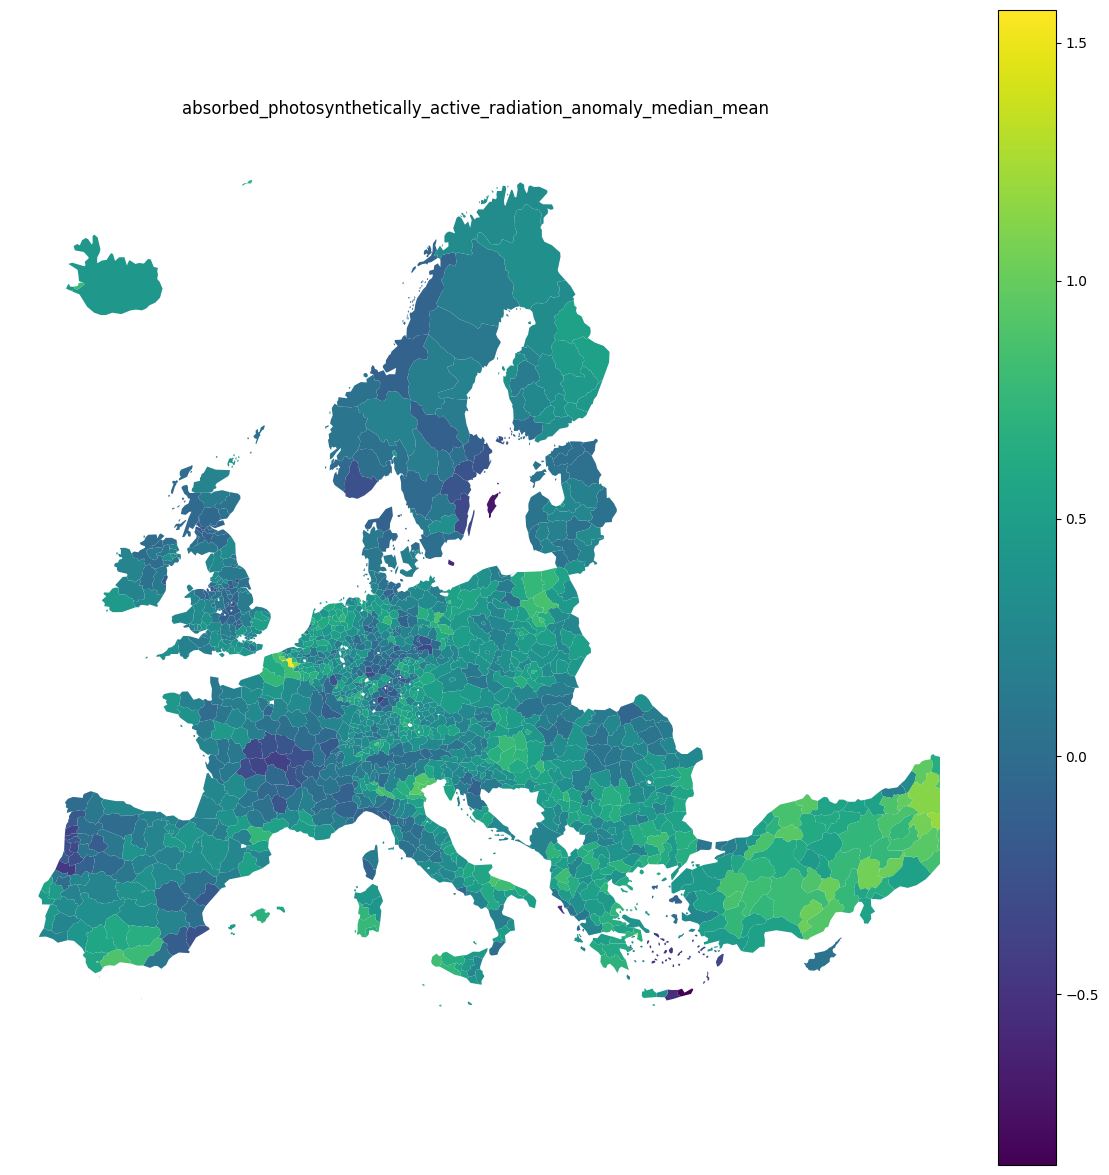

In [435]:
plot_map_for('absorbed_photosynthetically_active_radiation_anomaly_median_mean', merged_data)

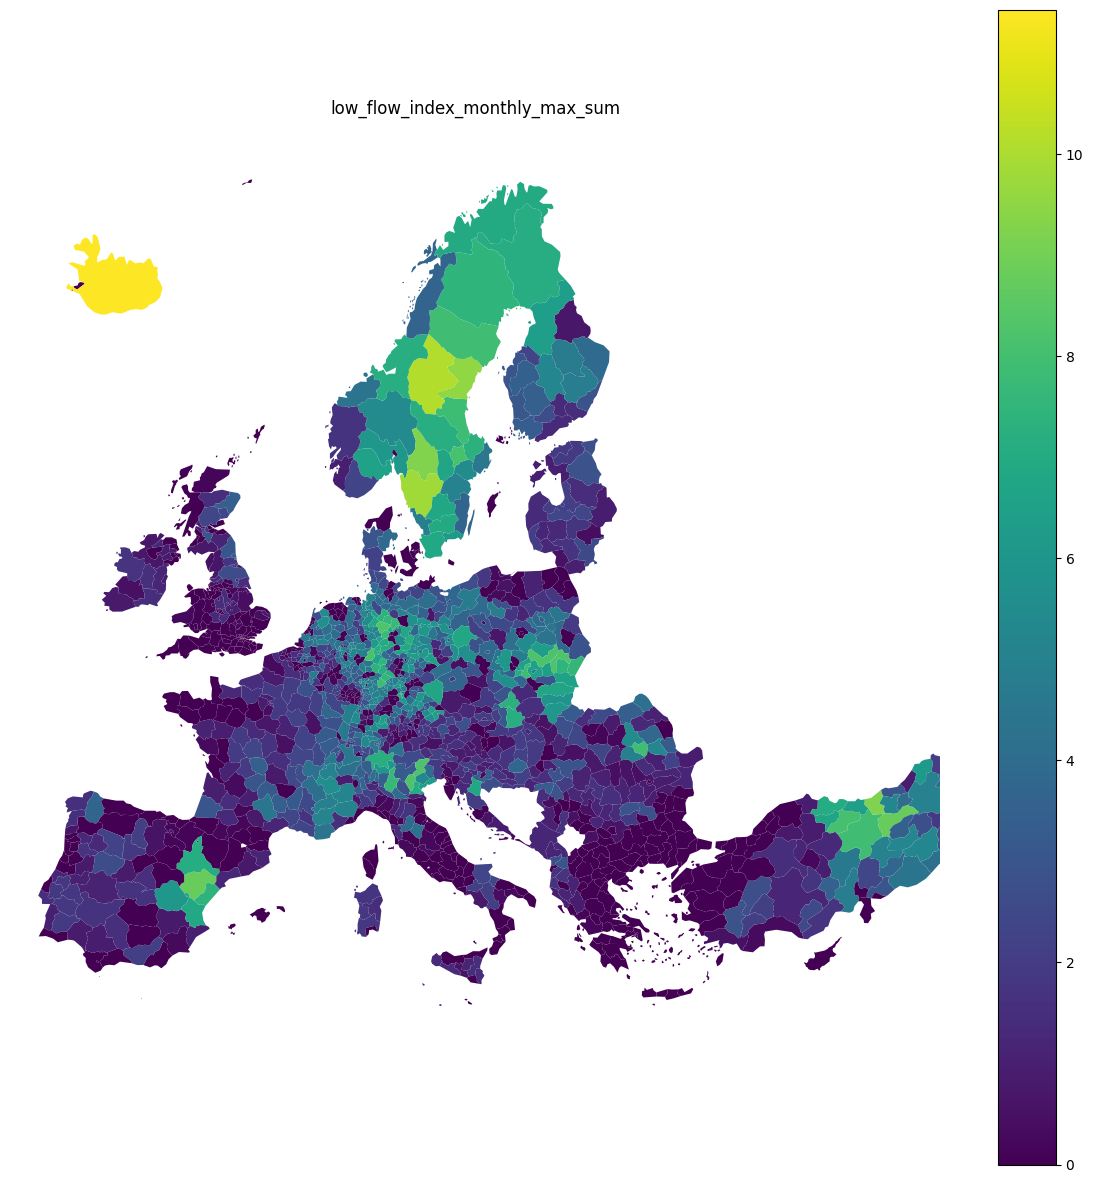

In [387]:
plot_map_for('low_flow_index_monthly_max_sum', merged_data)

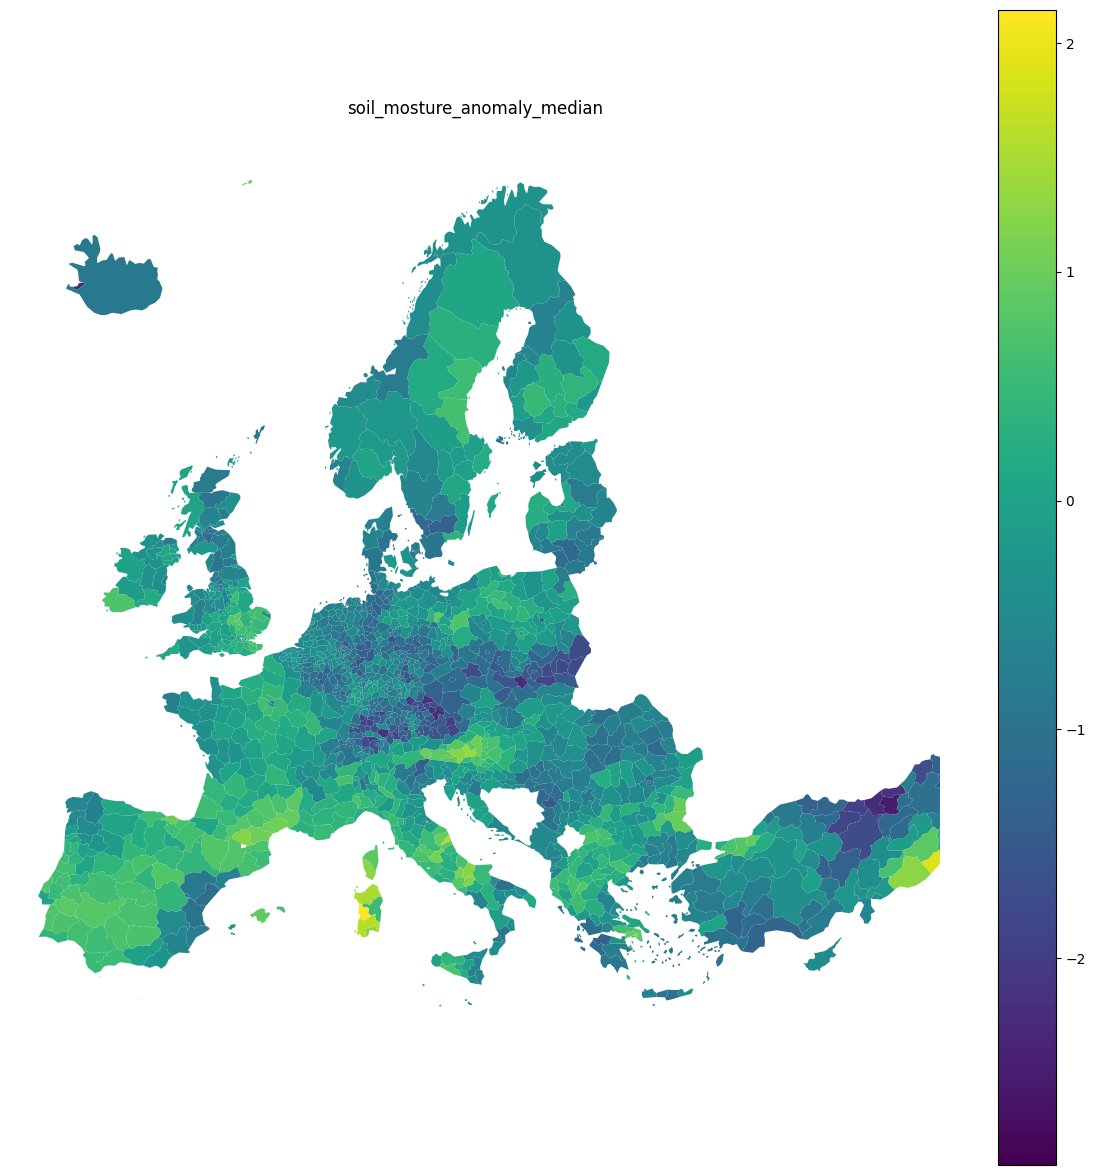

In [305]:
plot_map_for('soil_mosture_anomaly_median', merged_data)

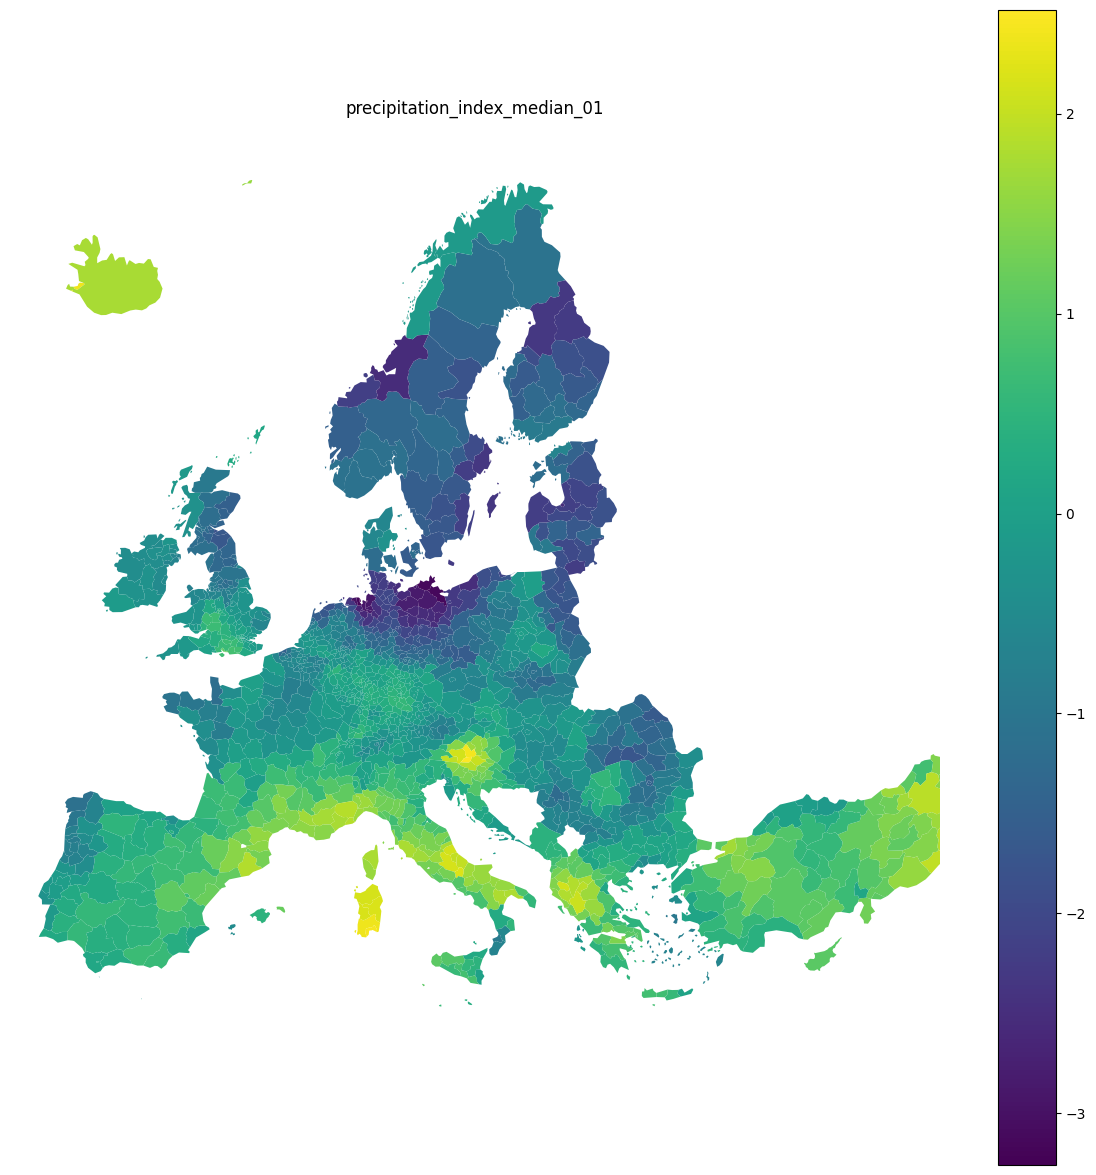

In [307]:
plot_map_for('precipitation_index_median_01', merged_data)

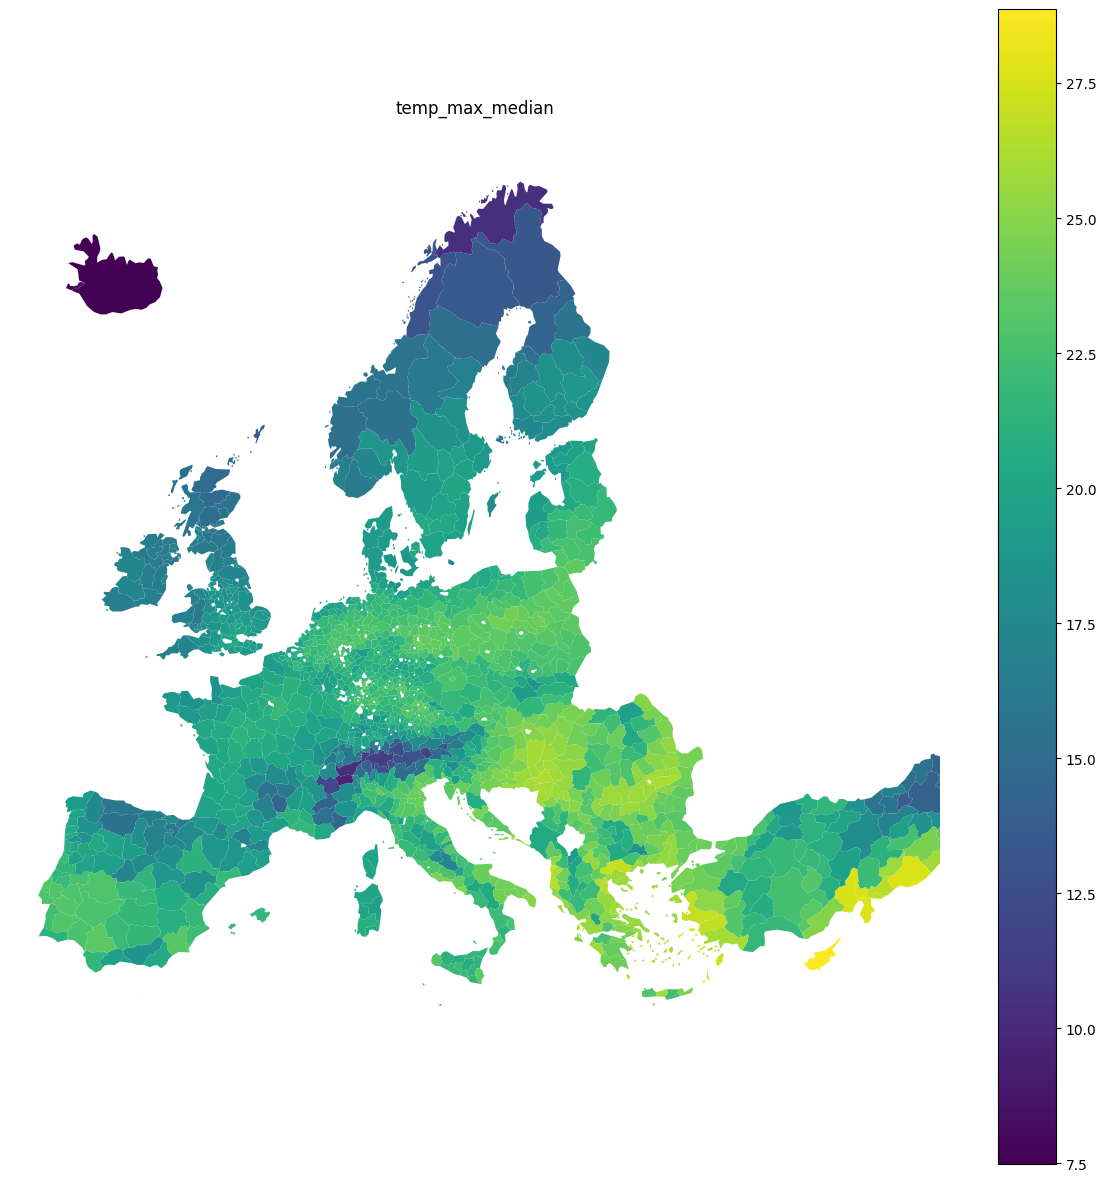

In [308]:
plot_map_for('temp_max_median', merged_data)